# ***Activity 2***


> *Catanus, Jeziah Lois*

> *Fagarita, Dave*

> *Magno, Jannica Mae*

> *Servandil, Jimuel*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
 # Load the dataset
df = pd.read_csv('indeed.csv')

# **K-Means**

In [3]:
from sklearn.metrics import silhouette_score
import numpy as np
import pickle

# Define the k-means clustering algorithm
def k_means(data, k, max_iter):
    # Randomly initialize k centroids
    centroids = data.sample(n=k, random_state=42)
    centroids.index = range(k)

    # Initialize a dictionary to store the cluster assignments
    clusters = {}

    # Run the k-means algorithm for the specified number of iterations
    for i in range(max_iter):
        # Assign each data point to the nearest centroid
        for j in range(len(data)):
            distances = []
            for c in centroids.index:
              # Calculate the distances using Euclidean distance metric
                distances.append(np.sqrt(((data.iloc[j] - centroids.loc[c])**2).sum()))
            cluster = np.argmin(distances)
            if cluster not in clusters:
                clusters[cluster] = []
            clusters[cluster].append(j)

        # Recalculate the centroids
        for c in clusters:
            centroids.loc[c] = data.iloc[clusters[c]].mean()

    # Create a list of cluster assignments for each data point
    labels = np.zeros(len(data))
    for c in clusters:
        for i in clusters[c]:
            labels[i] = c
    
    # Calculate the silhouette score for evaluation
    silhouette_avg = silhouette_score(data, labels)
    print("The average silhouette_score is :", silhouette_avg)
    
    # Return the cluster assignments and centroids
    return clusters, centroids, silhouette_avg

# Run k-means clustering on the iris dataset with k=3
clusters, centroids, silhouette_avg = k_means(df.drop('Job_Pos', axis=1), k=4, max_iter=100)


The average silhouette_score is : 0.6621242593156673


# **Visualization**

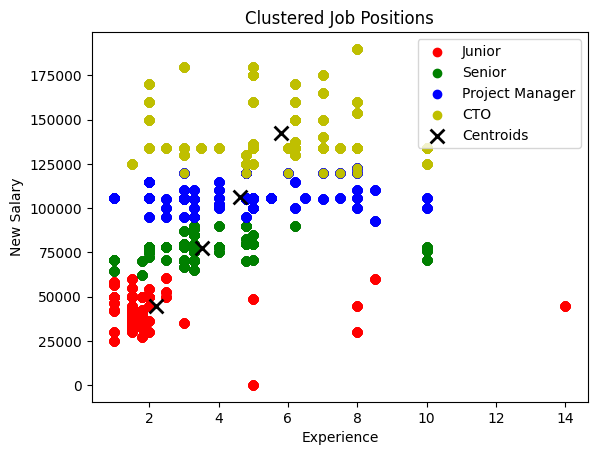

In [4]:
fig, ax = plt.subplots()
colors = ['r', 'g', 'b', 'y']
labels = ['Junior', 'Senior', 'Project Manager', 'CTO']
for i, c in enumerate(clusters):
    ax.scatter(df.loc[clusters[c], 'Experience'], df.loc[clusters[c], 'New Salary'], color=colors[i], label=labels[i])
ax.scatter(centroids['Experience'], centroids['New Salary'], marker='x', color='k', s=100, linewidth=2, label='Centroids')
ax.set_xlabel('Experience')
ax.set_ylabel('New Salary')
ax.set_title('Clustered Job Positions')
ax.legend()

# save the figure object to a pickle file
with open('km_model.pkl', 'wb') as f:
    pickle.dump(fig, f)


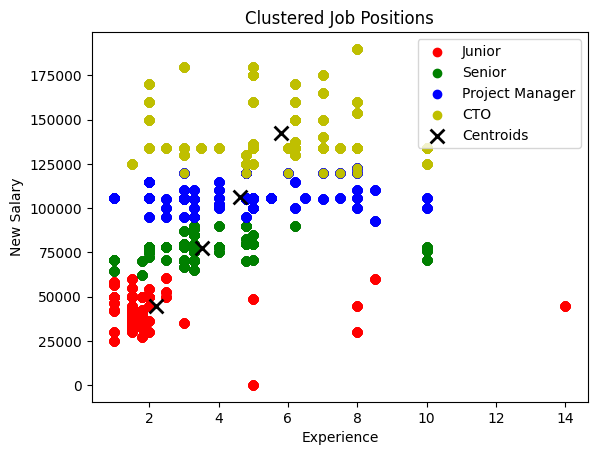

In [5]:
# load the figure from the pickle file
with open('km_model.pkl', 'rb') as f:
    fig = pickle.load(f)

# save the figure as an image file
fig.savefig('../static/images/cluster.png', format='png')